# Заранее прошу прощения за оформление кода - пока учусь

In [5]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [15]:
import seaborn as sns
sns.set()  # более красивый внешний вид графиков по умолчанию

In [4]:
from itertools import combinations

In [5]:
from scipy.stats import ttest_ind

In [6]:
pd.set_option('display.max_rows', 50)  # показывать больше строк
pd.set_option('display.max_columns', 50)  # показывать больше колонок

cacao = pd.read_csv('stud_math.csv')

In [10]:
display(cacao.head(10))
cacao.info()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

In [16]:
# просто пробую использовать функцию для определения количества нулей
len(cacao.loc[pd.isnull(cacao['address'])])

17

In [17]:
cacao.corr()

,age,Medu,Fedu,traveltime,studytime,failures,"studytime, granular",famrel,freetime,goout,health,absences,score
age,1.000000,-0.161704,-0.138018,0.081508,-0.015556,0.228047,0.015556,0.068899,0.029023,0.135107,-0.065946,0.093592,-0.155726
Medu,-0.161704,1.000000,0.275598,-0.173515,0.078589,-0.245463,-0.078589,-0.010050,0.025335,0.064164,-0.045051,-0.011944,0.213349
Fedu,-0.138018,0.275598,1.000000,0.030646,0.057199,-0.150821,-0.057199,0.040577,-0.066556,-0.023282,0.027251,0.004695,0.078573
traveltime,0.081508,-0.173515,0.030646,1.000000,-0.102206,0.064699,0.102206,-0.016857,-0.021937,0.037636,-0.021531,-0.048215,-0.070559
studytime,-0.015556,0.078589,0.057199,-0.102206,1.000000,-0.178992,-1.000000,0.045894,-0.121969,-0.051280,-0.080016,-0.026544,0.115741
failures,0.228047,-0.245463,-0.150821,0.064699,-0.178992,1.000000,0.178992,-0.022655,0.098382,0.120914,0.081284,0.057391,-0.344338
"studytime, granular",0.015556,-0.078589,-0.057199,0.102206,-1.000000,0.178992,1.000000,-0.045894,0.121969,0.051280,0.080016,0.026544,-0.115741
famrel,0.068899,-0.010050,0.040577,-0.016857,0.045894,-0.022655,-0.045894,1.000000,0.175743,0.081154,0.077474,-0.082609,0.057112
freetime,0.029023,0.025335,-0.066556,-0.021937,-0.121969,0.098382,0.121969,0.175743,1.000000,0.296437,0.061575,0.009292,0.019026
goout,0.135107,0.064164,-0.023282,0.037636,-0.051280,0.120914,0.051280,0.081154,0.296437,1.000000,-0.015608,-0.048738,-0.129685


In [18]:
# столбец 'studytime, granular' имеет такое же значение корреляции, что и в столбце 'studytime'
del cacao['studytime, granular']
# выбросим его.  Таким образом я снижаю размерность задачи.

## Выброс, уходи!

count    389.000000
mean      52.262211
std       22.919022
min        0.000000
25%       40.000000
50%       55.000000
75%       70.000000
max      100.000000
Name: score, dtype: float64

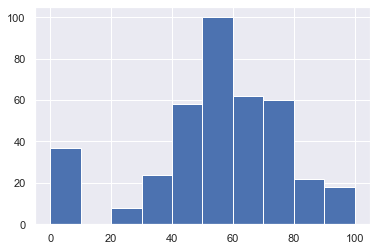

In [57]:
# рассмотрим тему выброса на столбце failures
cacao.score.hist()
cacao.score.describe()

55.0 30.0 10.0 100.0


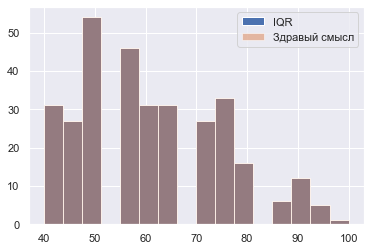

In [58]:
median = cacao.score.median()
IQR = cacao.score.quantile(0.75) - cacao.score.quantile(0.25)
print(median, IQR, median - 1.5*IQR, median + 1.5*IQR)
cacao.score.loc[cacao.score.between(median - 1.5*IQR, median + 1.5*IQR)].hist(bins=16, range=(40, 100),
                                                                              label='IQR')
cacao.score.loc[cacao.score <= 100].hist(alpha=0.5, bins=16, range=(40, 100),
                                         label='Здравый смысл')
plt.legend()

### пока не понял, что это значит, пока не въехал в этот инструмент

## Разделим датасет по признаку школы и посмотрим какая в них атмосфера.

In [7]:
cacao["school"].unique()

array(['GP', 'MS'], dtype=object)

In [11]:
cacaogp = cacao[cacao.school == "GP"]
cacaogp.score.mean()

52.63081395348837

In [12]:
cacaoms = cacao[cacao.school == "MS"]
cacaoms.score.mean()

49.44444444444444

В принципе, можно отдавать своих детей в любую из этих школ, потому что балл по экамену одинаково низкий. Лучше учить детей дома.

## Анализируем дальше

In [19]:
cacao.corr()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,health,absences,score
age,1.000000,-0.161704,-0.138018,0.081508,-0.015556,0.228047,0.068899,0.029023,0.135107,-0.065946,0.093592,-0.155726
Medu,-0.161704,1.000000,0.275598,-0.173515,0.078589,-0.245463,-0.010050,0.025335,0.064164,-0.045051,-0.011944,0.213349
Fedu,-0.138018,0.275598,1.000000,0.030646,0.057199,-0.150821,0.040577,-0.066556,-0.023282,0.027251,0.004695,0.078573
traveltime,0.081508,-0.173515,0.030646,1.000000,-0.102206,0.064699,-0.016857,-0.021937,0.037636,-0.021531,-0.048215,-0.070559
studytime,-0.015556,0.078589,0.057199,-0.102206,1.000000,-0.178992,0.045894,-0.121969,-0.051280,-0.080016,-0.026544,0.115741
failures,0.228047,-0.245463,-0.150821,0.064699,-0.178992,1.000000,-0.022655,0.098382,0.120914,0.081284,0.057391,-0.344338
famrel,0.068899,-0.010050,0.040577,-0.016857,0.045894,-0.022655,1.000000,0.175743,0.081154,0.077474,-0.082609,0.057112
freetime,0.029023,0.025335,-0.066556,-0.021937,-0.121969,0.098382,0.175743,1.000000,0.296437,0.061575,0.009292,0.019026
goout,0.135107,0.064164,-0.023282,0.037636,-0.051280,0.120914,0.081154,0.296437,1.000000,-0.015608,-0.048738,-0.129685
health,-0.065946,-0.045051,0.027251,-0.021531,-0.080016,0.081284,0.077474,0.061575,-0.015608,1.000000,-0.016222,-0.070460


У меня предложение: убрать из датасета учеников, которые получили за экзамен 0. Аргументирую тем, что у нас недостаточно данных относительно того, почему они не сдали, то ли электричка их на экзамен не доставила, то ли ещё что.

In [22]:
cacao1 = cacao[cacao.score != 0]

In [23]:
cacao1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 358 entries, 0 to 394
Data columns (total 29 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      358 non-null    object 
 1   sex         358 non-null    object 
 2   age         358 non-null    int64  
 3   address     342 non-null    object 
 4   famsize     334 non-null    object 
 5   Pstatus     317 non-null    object 
 6   Medu        356 non-null    float64
 7   Fedu        337 non-null    float64
 8   Mjob        341 non-null    object 
 9   Fjob        326 non-null    object 
 10  reason      343 non-null    object 
 11  guardian    329 non-null    object 
 12  traveltime  335 non-null    float64
 13  studytime   351 non-null    float64
 14  failures    338 non-null    float64
 15  schoolsup   349 non-null    object 
 16  famsup      321 non-null    object 
 17  paid        321 non-null    object 
 18  activities  346 non-null    object 
 19  nursery     345 non-null    o

In [25]:
cacao2 = cacao1.corr()  # собрал корреляции

In [32]:
cacao3 = cacao2.score.apply(abs)  # взял абсолютные значения корреляций

In [34]:
cacao3.sort_values()  # отсортировал корреляции

freetime      0.012457
absences      0.014039
famrel        0.046717
Fedu          0.069842
health        0.075340
traveltime    0.075516
age           0.131542
studytime     0.142055
goout         0.182286
Medu          0.186477
failures      0.289377
score         1.000000
Name: score, dtype: float64

In [36]:
arr = cacao1[['score', 'failures', 'Medu', 'goout', 'studytime',
              'age', 'traveltime', 'health', 'Fedu', 'famrel']].values
# создал массив самых весомых корреляций, по сути пренебрёг freetime и absences

## Хочу проанализировать пул детёнышей, которые сдали экзамен на 5 (приму за оценку "отлично" score > 80 баллов)

In [37]:
# смотрю количество строк в массиве по столбцу 0, который scores
print((arr[:, 0] > 80.0).sum())

24


<ipython-input-37-0376d200ac2d>:1: RuntimeWarning: invalid value encountered in greater
  print((arr[:, 0] > 80.0).sum())


In [2]:
class color:  # хочу добавить красоты в мой код
    PURPLE = '\033[95m'
    CYAN = '\033[96m'
    DARKCYAN = '\033[36m'
    BLUE = '\033[94m'
    GREEN = '\033[92m'
    YELLOW = '\033[93m'
    RED = '\033[91m'
    BOLD = '\033[1m'
    UNDERLINE = '\033[4m'
    END = '\033[0m'

In [3]:
print(color.BOLD, "Процент учеников, сдавших экзамен на отлично, равен",
      round(24/395*100, 2), color.END)

 Процент учеников, сдавших экзамен на отлично, равен 6.08 


# Выводы

In [ ]:
1. Средний балл в школах GP и MS примерно одинаковый.
2. Самая сильная корреляция со scores у признака failures.
3. Всего отличников 6 % от общего количества.

P.S. Мне кажется, я всё-таки не вычислил студентов, находящихся в группе риска.